##**TASK - 4**



##**Traffic Accident Data Analysis 🚦**

🔹 **Dataset used:**  
📂 **Road Traffic Accident (RTA) Dataset** – a real-world dataset containing accident details such as time, weather conditions, road surface conditions, area name, and accident severity.


In [1]:
from google.colab import files
uploaded = files.upload()


Saving RTA Dataset.csv.zip to RTA Dataset.csv.zip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import zipfile

with zipfile.ZipFile("RTA Dataset.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv("RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [15]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Hour', 'Time_of_Day'],
      dtype='object')

In [6]:
df = df.dropna()


In [16]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')
df['Hour'] = df['Time'].dt.hour


In [8]:
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Hour'].apply(time_of_day)


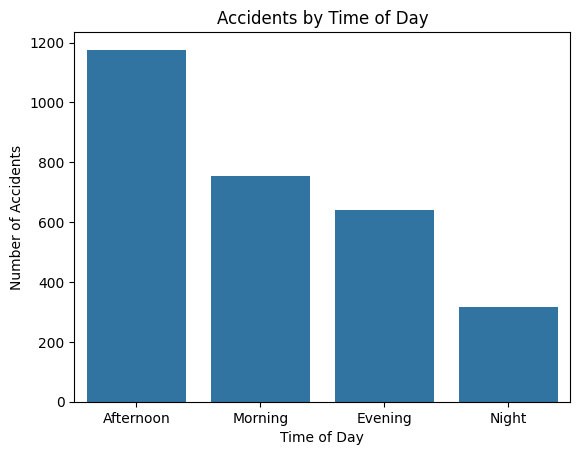

In [17]:
sns.countplot(x='Time_of_Day', data=df)
plt.title("Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.show()


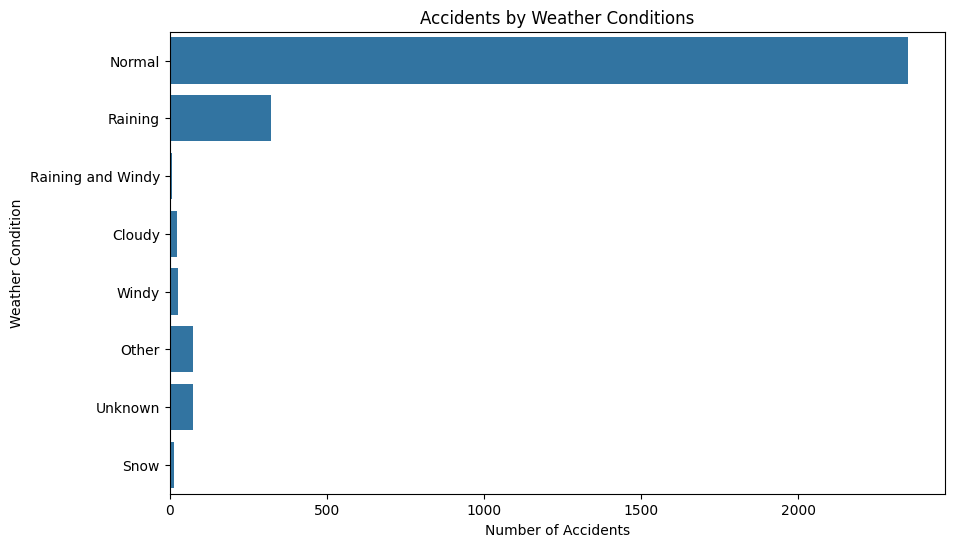

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(y='Weather_conditions', data=df)
plt.title("Accidents by Weather Conditions")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()


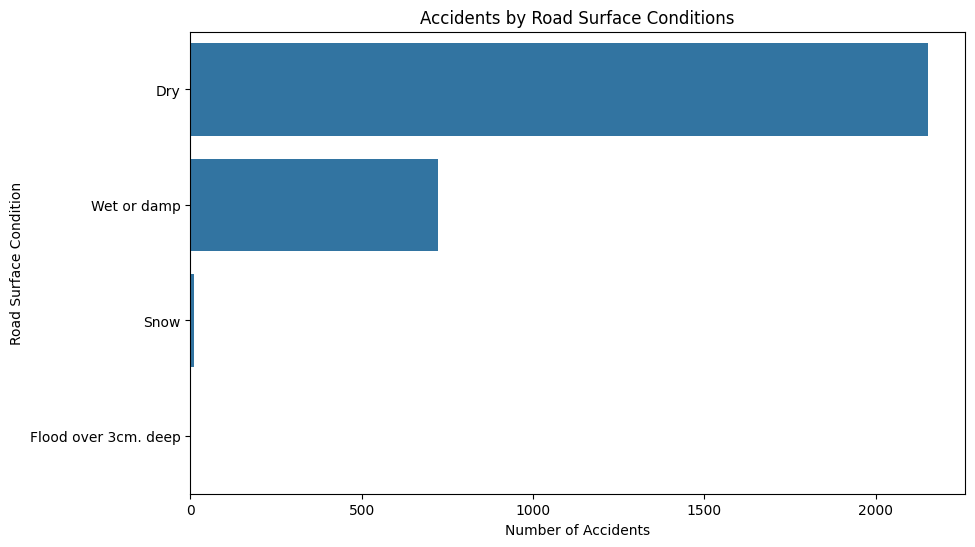

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(y='Road_surface_conditions', data=df)
plt.title("Accidents by Road Surface Conditions")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Surface Condition")
plt.show()


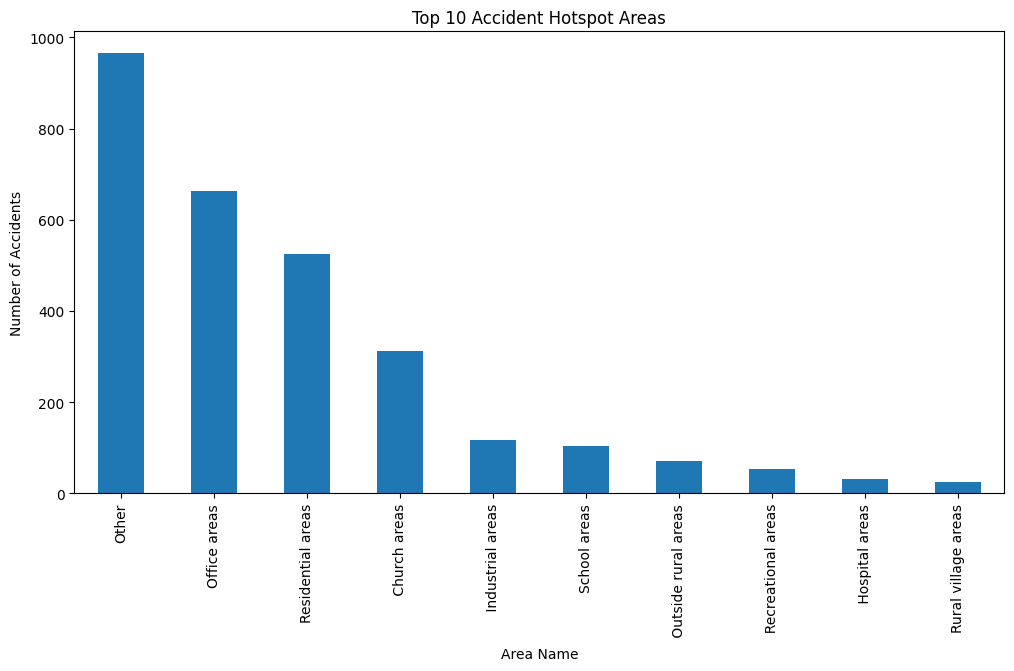

In [22]:
plt.figure(figsize=(12,6))
df['Area_accident_occured'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Accident Hotspot Areas")
plt.xlabel("Area Name")
plt.ylabel("Number of Accidents")
plt.show()

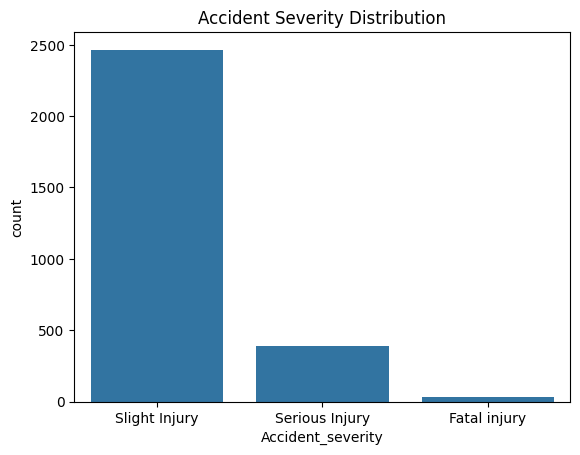

In [21]:
sns.countplot(x='Accident_severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()


## **Final Summary 🚦**

- Accident patterns were analyzed based on **time of day ⏰, weather conditions 🌦️, and road surface conditions 🛣️**  
- Most accidents occurred during **morning and evening peak hours**, indicating the impact of traffic congestion  
- Weather and poor road conditions were found to increase accident risk  
- Area-wise analysis helped identify **accident hotspot locations 📍**  
- The study highlights how **data analysis and visualization 📊** can support better road safety planning and decision-making
